In [23]:
from sklearn import datasets
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [24]:
work_directory = "../../combustiveis/"
dataset_name = "dataset_etanol_gasolina_guarulhos.csv"

df_original = pd.read_csv(work_directory + dataset_name, sep=",", decimal=".", encoding="cp860", index_col=False)

In [25]:
df = df_original

In [26]:
df = df.dropna()

In [27]:
semestres = np.unique(df["Semestre"])

anos = np.unique([x.split("-")[0] for x in semestres])

for ano in anos:
    df = df.replace("^" + ano + ".*", str(ano), regex=True)

df = df.rename(columns={"Semestre": "Ano"})

contadores = df["Ano"].value_counts()

print(contadores)


2005    934
2006    837
2007    779
2004    660
2010    542
2013    520
2011    486
2008    486
2014    469
2012    469
2015    432
2009    414
2018    404
2016    370
2019    326
2017    292
2020     61
Name: Ano, dtype: int64


<AxesSubplot:xlabel='Produto', ylabel='count'>

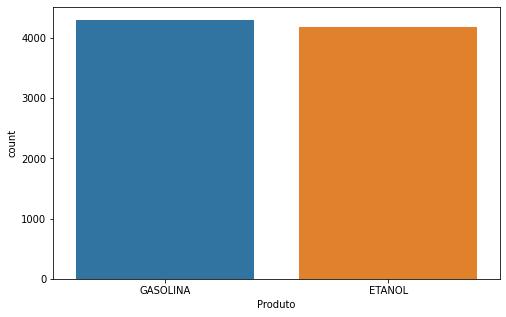

In [28]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.countplot(x="Produto", data=df, ax=ax)

In [29]:
df = df[["Ano", "Valor de Compra", "Valor de Venda", "Produto"]]

In [30]:
df.head()

,Ano,Valor de Compra,Valor de Venda,Produto
22,2020,3.9182,4.349,GASOLINA
23,2020,2.6726,2.949,ETANOL
156,2020,3.9960,4.699,GASOLINA
157,2020,2.8030,3.099,ETANOL
158,2020,3.9604,4.279,GASOLINA


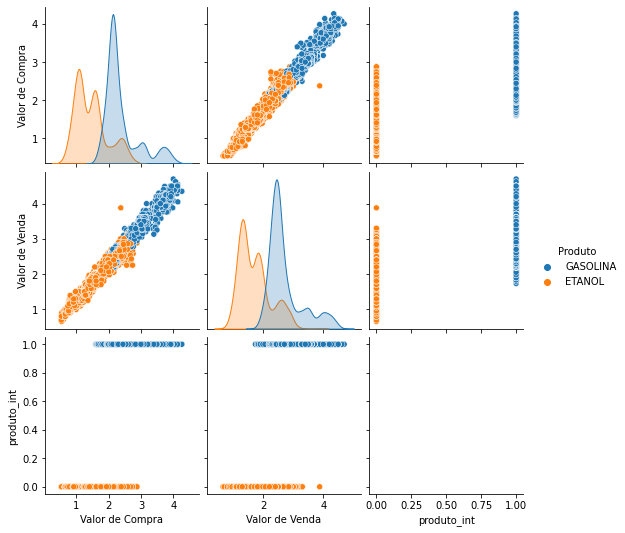

In [41]:
sns.pairplot(df, hue='Produto')

In [32]:
df['produto_int'] = pd.Categorical(df['Produto']).codes

In [34]:
df.head()

,Ano,Valor de Compra,Valor de Venda,Produto,produto_int
22,2020,3.9182,4.349,GASOLINA,1
23,2020,2.6726,2.949,ETANOL,0
156,2020,3.9960,4.699,GASOLINA,1
157,2020,2.8030,3.099,ETANOL,0
158,2020,3.9604,4.279,GASOLINA,1


In [33]:
# Definindo valores que serão utilizados
X = df[["Valor de Compra", "Valor de Venda"]]
y = df["produto_int"]

# Separando dados de treino e de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [35]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [36]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=2, p=2, metric='minkowski')

KNN.fit(X_train_std, y_train)

KNeighborsClassifier(n_neighbors=2)

In [37]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined_std = np.hstack((y_train, y_test))

In [38]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import matplotlib
from distutils.version import LooseVersion

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    color=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')
        
    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]
    
    if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):
        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100,
                    label='test set')
    else:
        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100,
                    label='test set')

/tmp/ipykernel_7699/1485689645.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


UnboundLocalError: local variable 'X_test' referenced before assignment

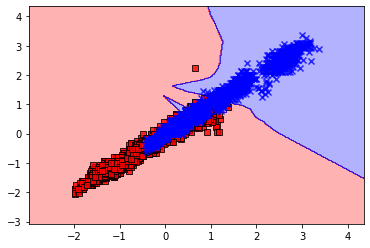

In [39]:
plot_decision_regions(X_combined_std, y_combined_std, classifier=KNN)